# Reading and normalizing data

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [34]:
data = pd.read_csv("train.csv")
names = data["Name"]
data = data.drop("Name", axis = 1)
data["Sex"] = data["Sex"].map({"male": 1, "female": 0})
data["Embarked"] = data["Embarked"].map({"S": 0, "C": 1, "Q": 2})
data = data.fillna(-1)

In [35]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,-1,0.0
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,-1,0.0
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,1,35.0,0,0,373450,8.0500,-1,0.0


In [36]:
data["Sex"].value_counts(dropna = False)

1    577
0    314
Name: Sex, dtype: int64

In [37]:
data.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.037997,-0.057527,-0.001652,0.012658,-0.030323
Survived,-0.005007,1.000000,-0.338481,-0.543351,0.012439,-0.035322,0.081629,0.257307,0.101849
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.359728,0.083081,0.018443,-0.549500,0.050992
Sex,0.042939,-0.543351,0.131900,1.000000,0.023365,-0.114631,-0.245489,-0.182333,-0.111249
Age,0.037997,0.012439,-0.359728,0.023365,1.000000,-0.182282,-0.045272,0.135707,-0.217518
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.182282,1.000000,0.414838,0.159651,-0.058008
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.045272,0.414838,1.000000,0.216225,-0.076625
Fare,0.012658,0.257307,-0.549500,-0.182333,0.135707,0.159651,0.216225,1.000000,0.058462
Embarked,-0.030323,0.101849,0.050992,-0.111249,-0.217518,-0.058008,-0.076625,0.058462,1.000000


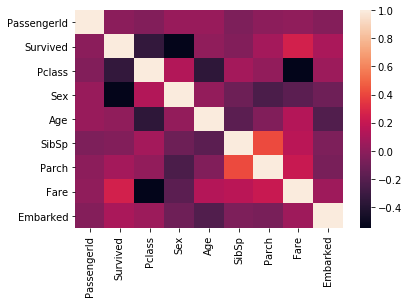

In [38]:
sns.heatmap(data.corr())

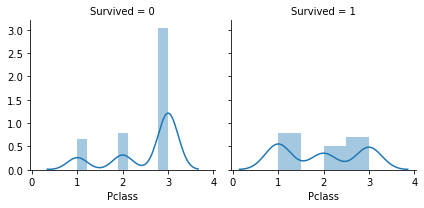

In [39]:
grid = sns.FacetGrid(data, col = "Survived")
grid.map(sns.distplot, "Pclass");

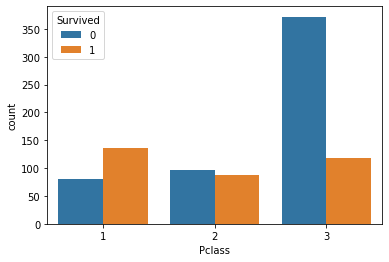

In [40]:
sns.countplot(data = data, x = "Pclass", hue = "Survived"); ## Same plot but on the one figure

In [41]:
data[data["Pclass"] == 3]["Survived"].value_counts(normalize = True)

0    0.757637
1    0.242363
Name: Survived, dtype: float64

###### 1st conclusion: people with pclass 3 are more likely to die

##### Let's have a look at the known ages

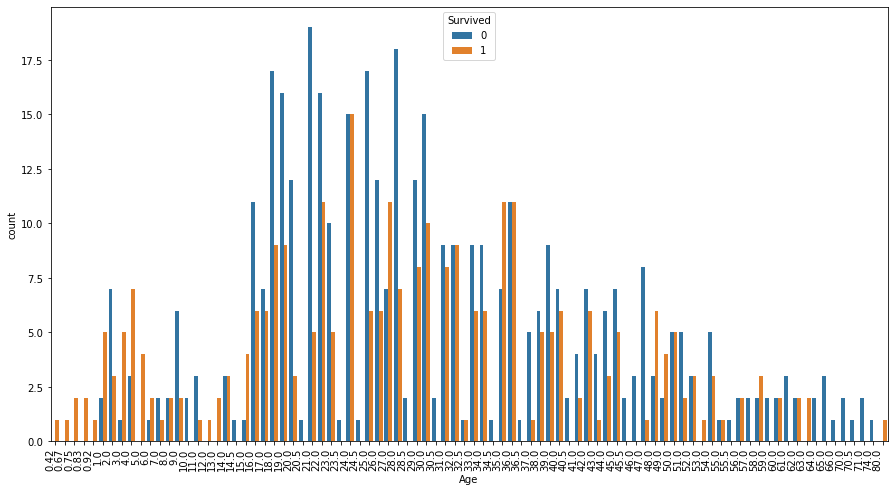

In [42]:
plt.figure(figsize=(15, 8))

ax = sns.countplot(data[data["Age"] > -1]["Age"], hue = data["Survived"])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, ha = "right");

###### We see that young people (from 15 to 33 years) mostly died. 

In [43]:
data[(15 < data["Age"]) & (data["Age"] < 33)]["Survived"].value_counts(normalize = True)

0    0.630137
1    0.369863
Name: Survived, dtype: float64

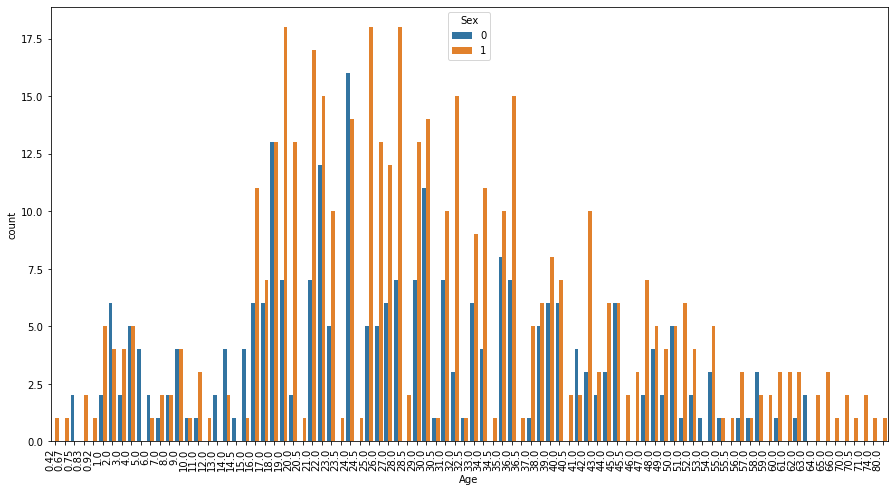

In [44]:
plt.figure(figsize=(15, 8))

ax = sns.countplot(data[data["Age"] > -1]["Age"], hue = data["Sex"])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, ha = "right");

###### Also, there is the same distribution of sex for people between 15 and 33 years

In [45]:
data[(15 < data["Age"]) & (data["Age"] < 33)]["Sex"].value_counts(normalize = True)

1    0.652055
0    0.347945
Name: Sex, dtype: float64

###### Let's have a look at other known ages below

In [46]:
data[data["Age"] >=33]["Survived"].value_counts(normalize = True)

0    0.601504
1    0.398496
Name: Survived, dtype: float64

In [47]:
data[data["Age"] >= 33]["Sex"].value_counts(normalize = True)

1    0.657895
0    0.342105
Name: Sex, dtype: float64

In [48]:
data[(data["Age"] <= 15) & (data["Age"] > -1)]["Survived"].value_counts(normalize = True)

1    0.590361
0    0.409639
Name: Survived, dtype: float64

In [49]:
data[(data["Age"] <= 15) & (data["Age"] > -1)]["Sex"].value_counts(normalize = True)

0    0.518072
1    0.481928
Name: Sex, dtype: float64

##### The survived rate has 4.6% difference with sex distribution for people elder than 33 years

###### Let's have a look at sex distribution below

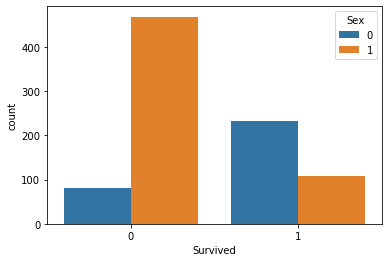

In [50]:
sns.countplot(data["Survived"], hue = data["Sex"]);

In [51]:
data[data["Survived"] == 0]["Sex"].value_counts(normalize = True)

1    0.852459
0    0.147541
Name: Sex, dtype: float64

In [52]:
data[data["Survived"] == 1]["Sex"].value_counts(normalize = True)

0    0.681287
1    0.318713
Name: Sex, dtype: float64

###### 2nd concusion: died people are mostly men
###### 3rd conclusion: the young people between 15 and 33 have the same percentage of surviving and sex (approximately 64% and 36%)

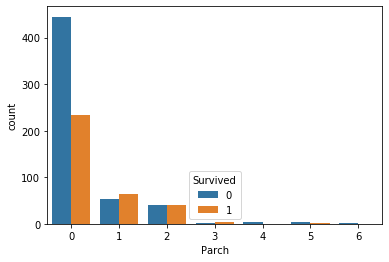

In [80]:
sns.countplot(data["Parch"], hue = data["Survived"]);

###### Nearly lognormal distribution above for "Parch" feature

In [54]:
data["Embarked"].value_counts()

 0.0    644
 1.0    168
 2.0     77
-1.0      2
Name: Embarked, dtype: int64

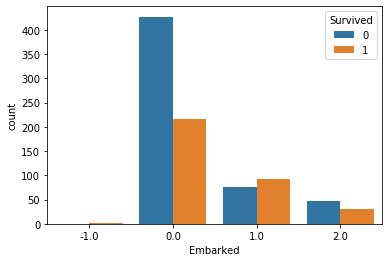

In [55]:
sns.countplot(data = data, x = "Embarked", hue = "Survived");

###### Also nearly lognormal distribution above for "Embarked" feature

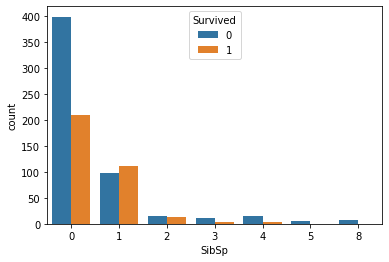

In [56]:
sns.countplot(data = data, x = "SibSp", hue = "Survived");

###### Final conclusion: Random Forest may be useful

# TSNE

In [58]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
tsne = TSNE(n_components = 2, random_state = 11)

In [60]:
data_dummies = pd.get_dummies(data)

In [63]:
tsne_repr = tsne.fit_transform(StandardScaler().fit_transform(data_dummies))

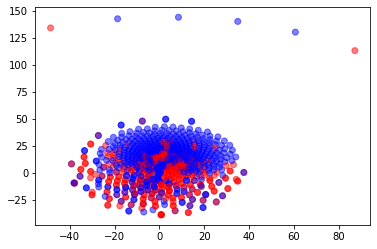

In [64]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1],
            c = data['Survived'].map({0: 'blue', 1: 'red'}), alpha=.5);

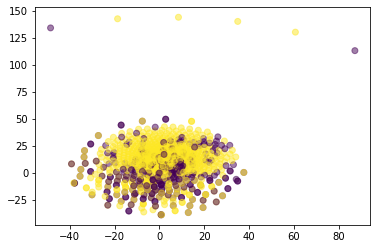

In [65]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1],
            c = data['Sex'], alpha=.5);

# Nothing attractive. Let's have a look at the data without Tickets and Cabins 

In [67]:
data_cutted = data.drop(["Cabin", "Ticket"], axis = 1)

In [69]:
tsne_repr = tsne.fit_transform(StandardScaler().fit_transform(data_cutted))

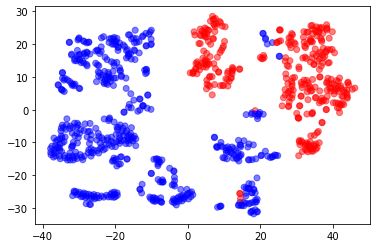

In [77]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1],
            c = data['Survived'].map({0: 'blue', 1: 'red'}), alpha=.5);

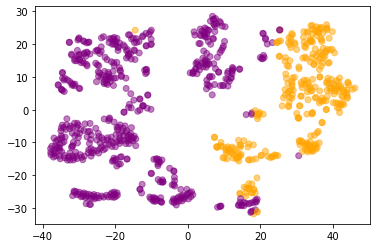

In [76]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1],
            c = data['Sex'].map({0: 'orange', 1: 'purple'}), alpha=.5);

###### The same result: most died people are men, most survived people are women

###### Final Conclusion: Logistic Regression may be usefull. Maybe Scaling is needed